In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification

In [180]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,n_clusters_per_class=1 ,random_state=5)
# X, y = make_blobs(n_samples=500, n_features=2, centers=2)

In [181]:
X.shape

(500, 2)

In [182]:
y = y.reshape(-1, 1)

In [183]:
y.shape

(500, 1)

In [184]:
X[:5]

array([[ 1.22167239, -0.4757541 ],
       [-0.2292072 , -1.85663378],
       [-1.34913896,  0.50458721],
       [ 0.31402206, -1.62029248],
       [ 1.13807877, -0.99148158]])

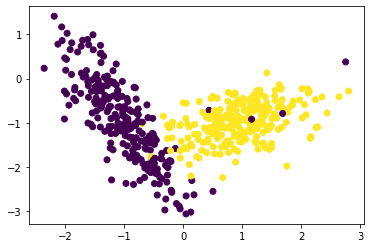

In [185]:
plt.scatter(X[:, 0], X[:, 1], c= y)
plt.show()

In [186]:
ones= np.ones((500,1))
X_ = np.hstack((ones, X))

In [187]:
X_[:5]

array([[ 1.        ,  1.22167239, -0.4757541 ],
       [ 1.        , -0.2292072 , -1.85663378],
       [ 1.        , -1.34913896,  0.50458721],
       [ 1.        ,  0.31402206, -1.62029248],
       [ 1.        ,  1.13807877, -0.99148158]])

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

### Logistic Regression

In [190]:
def sigmoid(z):
    return 1/ (1 + np.exp(-1*z))

In [191]:
# sig = sigmoid(np.arange(-10, 10, 0.1))
# plt.plot(sig)

In [192]:
def hypothesis(X, theta):
    """
    X - np array (m,n)
    theta - np arrary (n, 1)
    """
    return sigmoid(np.dot(X, theta))

In [193]:
def error(X, y, theta):
    """
    params:
        X - np array (m,n)
        y - np array (m,1)
        theta - np arrary (n,1)
    
    return :
        scalar value = loss value
    """
    hypo = hypothesis(X, theta)
    err = np.mean((y*np.log(hypo) + (1-y)*np.log(1- hypo)))
    
    return -err

In [194]:
def gradient(X, y, theta):
    """
    X - (m,n)
    y - (m,1)
    theta - (n,1)
    
    return - (n, 1)
    """
    
    hypo = hypothesis(X, theta)
    grad = (np.dot(X.T,(hypo - y)))
    return grad/X.shape[0]      

In [195]:
def gradient_descent(X, y, lr = 0.5, max_iter = 300):
    theta = np.zeros((X.shape[1], 1))
    
    error_list = []
    
    for _ in range(max_iter):
        e = error(X, y, theta)
        error_list.append(e)
        
        grad = gradient(X, y, theta)
        
        #Update Rule
        theta = theta - lr*grad
    
    return (theta, error_list)

In [196]:
opt_theta, error_list = gradient_descent(X_train, y_train)

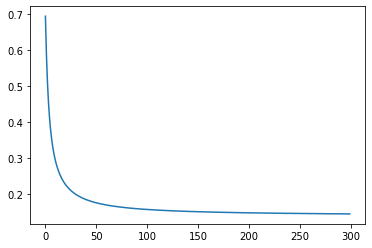

In [197]:
plt.plot(error_list)

In [198]:
opt_theta

array([[1.0374216 ],
       [4.19843548],
       [0.57863668]])

In [208]:
x1 = np.array([-1, 1])
x2 = - (opt_theta[0] + opt_theta[1]*x1) / opt_theta[2]

In [209]:
x2

array([ 5.46286467, -9.04860901])

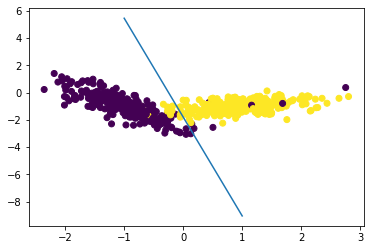

In [210]:
plt.scatter(X[:, 0], X[:, 1], c= y)
plt.plot(x1, x2)
plt.show()

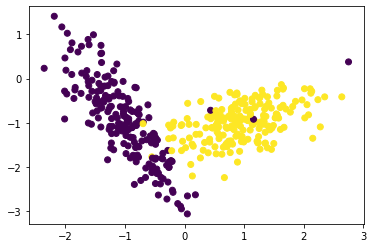

In [211]:
plt.scatter(X_train[:, 1], X_train[:,2], c= y_train)
plt.show()

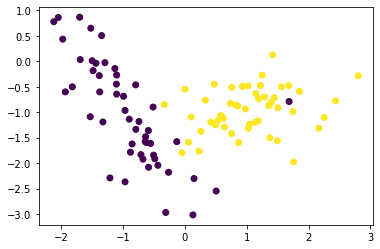

In [212]:
plt.scatter(X_test[:, 1], X_test[:,2], c= y_test)
plt.show()

### Prediction on test set

In [213]:
y_pred  = np.round(hypothesis(X_test, opt_theta)).astype('int')

In [214]:
y_test[:5]

array([[1],
       [1],
       [1],
       [0],
       [0]])

In [215]:
y_pred[:5]

array([[1],
       [1],
       [1],
       [0],
       [0]])

### Evaluation - Accuracy

In [216]:
def accuracy(y_test, y_pred):
    return (y_pred == y_test).mean()

In [217]:
accuracy(y_test, y_pred)

0.95

## Sklearn - Logistic Regression

In [218]:
from sklearn.linear_model import LogisticRegression

In [219]:
model = LogisticRegression()

In [220]:
model.fit(X_train, y_train)

/Users/mohit/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [221]:
model.predict(X_test)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [222]:
model.score(X_test, y_test)

0.95

In [223]:
model.score(X_train, y_train)

0.9675

In [224]:
model.coef_

array([[-3.17062293e-06,  3.89591876e+00,  8.50972735e-01]])

In [225]:
model.intercept_

array([1.46952407])